## Neural Network
### 19. Single Layer Networks Implementation

In [7]:
# XOR Problem
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

print(X.shape)


model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(1, input_dim=4, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
#model.fit(X, y, epochs=30000, verbose=2)
model.fit(X, y, epochs=3000, verbose=2)

print("Predictions after the training ...")
print(model.predict(X))

(4, 2)
Epoch 1/3000
1/1 - 0s - loss: 0.2572 - binary_accuracy: 0.5000 - 246ms/epoch - 246ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.2571 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.2569 - binary_accuracy: 0.5000 - 1ms/epoch - 1ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.2568 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.2566 - binary_accuracy: 0.5000 - 1000us/epoch - 1000us/step
Epoch 6/3000
1/1 - 0s - loss: 0.2564 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.2563 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.2561 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.2560 - binary_accuracy: 0.5000 - 1ms/epoch - 1ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.2558 - binary_accuracy: 0.5000 - 991us/epoch - 991us/step
Epoch 11/3000
1/1 - 0s - loss: 0.2557 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 12/3000
1/1 - 0s - loss: 

In [ ]:
# Iris dataset
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

iris_data = load_iris()

features = iris_data.data
labels = iris_data.target.reshape(-1, 1)

# we have 3 classes so the labels will have 3 values
# first class: (1,0,0) second class: (0,1,0) third class: (0,0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(labels).toarray()

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2)

model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
# softmax (normalized exponential function) is a generalization of logistic function
model.add(Dense(3, activation='softmax'))

# we can define the loss function MSE or negative log lokelihood
# optimizer will find the right adjustements for the weights: SGD, Adagrad, ADAM ...
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(train_features, train_targets, epochs=10000, batch_size=20, verbose=2)
results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)

In [ ]:
# Credit Scoring
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

credit_data = pd.read_csv("data/credit_data.csv")

features = credit_data[["income", "age", "loan"]]
y = np.array(credit_data.default).reshape(-1, 1)

# we have 2 classes so the labels will have 2 values
# first class: (1,0) second class: (0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(y).toarray()

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2)

model = Sequential()
model.add(Dense(10, input_dim=3, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(train_features, train_targets, epochs=1000, verbose=2)

results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)


### 22. Deep Neural Networks Implementation

In [1]:
# Deep Neural Network Implementation
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

# Why XOR? Because it is a non-linearly separable problem
# XOR problem training samples
training_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], "float32")

# XOR problem target values accordingly
target_data = np.array([[0], [1], [1], [0]], "float32")

# we can define the neural network layers in a sequential manner
model = Sequential()
# first parameter is output dimension
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# we can define the loss function MSE or negative log likelihood
# optimizer will find the right adjustments for the weights: SGD, Adagrad, ADAM ...
# ADAM = Adagrad + RMSPro
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

# epoch is an iteration over the entire dataset
# verbose 0 is silent 1 and 2 are showing results
model.fit(training_data, target_data, epochs=500, verbose=2)

# of course we can make prediction with the trained neural network
print(model.predict(training_data).round())


Epoch 1/500
1/1 - 1s - loss: 0.2496 - binary_accuracy: 0.5000 - 529ms/epoch - 529ms/step
Epoch 2/500
1/1 - 0s - loss: 0.2486 - binary_accuracy: 0.2500 - 2ms/epoch - 2ms/step
Epoch 3/500
1/1 - 0s - loss: 0.2480 - binary_accuracy: 0.2500 - 999us/epoch - 999us/step
Epoch 4/500
1/1 - 0s - loss: 0.2474 - binary_accuracy: 0.2500 - 2ms/epoch - 2ms/step
Epoch 5/500
1/1 - 0s - loss: 0.2469 - binary_accuracy: 0.2500 - 3ms/epoch - 3ms/step
Epoch 6/500
1/1 - 0s - loss: 0.2463 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 7/500
1/1 - 0s - loss: 0.2458 - binary_accuracy: 0.7500 - 1ms/epoch - 1ms/step
Epoch 8/500
1/1 - 0s - loss: 0.2454 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 9/500
1/1 - 0s - loss: 0.2450 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 10/500
1/1 - 0s - loss: 0.2446 - binary_accuracy: 0.7500 - 3ms/epoch - 3ms/step
Epoch 11/500
1/1 - 0s - loss: 0.2441 - binary_accuracy: 0.7500 - 2ms/epoch - 2ms/step
Epoch 12/500
1/1 - 0s - loss: 0.2437 - binary_accuracy:

In [3]:
# Multiclass Classification

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

dataset = load_iris()

features = dataset.data
y = dataset.target.reshape(-1, 1)  # make 2D dataset

encoder = OneHotEncoder(sparse=False)
targets = encoder.fit_transform(y)

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2)

model = Sequential()
# first parameter is output dimension
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# we can define the loss function MSE or negative log likelihood
# optimizer will find the right adjustments for the weights: SGD, Adagrad, ADAM ...
optimizer = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',  # ~ Negative Log Likelihood
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(train_features, train_targets, epochs=1000, batch_size=20, verbose=2)

results = model.evaluate(test_features, test_targets)
print("Accuracy on the test dataset: %.2f" % results[1])


Epoch 1/1000
6/6 - 0s - loss: 1.0596 - accuracy: 0.3833 - 295ms/epoch - 49ms/step
Epoch 2/1000
6/6 - 0s - loss: 1.0107 - accuracy: 0.6583 - 5ms/epoch - 835us/step
Epoch 3/1000
6/6 - 0s - loss: 0.9784 - accuracy: 0.6000 - 5ms/epoch - 836us/step
Epoch 4/1000
6/6 - 0s - loss: 0.9239 - accuracy: 0.6750 - 5ms/epoch - 884us/step
Epoch 5/1000
6/6 - 0s - loss: 0.8641 - accuracy: 0.7083 - 4ms/epoch - 690us/step
Epoch 6/1000
6/6 - 0s - loss: 0.7922 - accuracy: 0.9000 - 6ms/epoch - 978us/step
Epoch 7/1000
6/6 - 0s - loss: 0.7192 - accuracy: 0.7750 - 6ms/epoch - 933us/step
Epoch 8/1000
6/6 - 0s - loss: 0.6384 - accuracy: 0.9333 - 6ms/epoch - 1ms/step
Epoch 9/1000
6/6 - 0s - loss: 0.5528 - accuracy: 0.8250 - 6ms/epoch - 1ms/step
Epoch 10/1000
6/6 - 0s - loss: 0.4797 - accuracy: 0.9333 - 6ms/epoch - 1ms/step
Epoch 11/1000
6/6 - 0s - loss: 0.4103 - accuracy: 0.9333 - 6ms/epoch - 979us/step
Epoch 12/1000
6/6 - 0s - loss: 0.3506 - accuracy: 0.9500 - 6ms/epoch - 1ms/step
Epoch 13/1000
6/6 - 0s - loss: 0

## 23. Machine Learning Project II: Smile Detector

In [2]:
from PIL import Image
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

directory = 'Data/smiles_dataset/training_set/'

pixel_intensities = []
# one-hot encoding: happy (1,0) and sad (0,1)
labels = []

for filename in os.listdir(directory):
    image = Image.open(directory+filename).convert('1')
    pixel_intensities.append(list(image.getdata()))
    if filename[0:5] == 'happy':
        labels.append([1, 0])
    elif filename[0:3] == 'sad':
        labels.append([0, 1])

pixel_intensities = np.array(pixel_intensities)
labels = np.array(labels)

# apply min-max normalization (here just /255)
pixel_intensities = pixel_intensities / 255.0

# create the model (deep neural networks)
model = Sequential()
model.add(Dense(1024, input_dim=1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=0.005)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.fit(pixel_intensities, labels, epochs=1000, batch_size=20, verbose=2)

# handle the test dataset (2 images)
print("Testing the neural network ....")

test_pixel_intensities = []

test_image1 = Image.open('Data/smiles_dataset/test_set/happy_test.png').convert('1')
test_pixel_intensities.append(list(test_image1.getdata()))

test_pixel_intensities = np.array(test_pixel_intensities)/255.0
print(model.predict(test_pixel_intensities).round())


Epoch 1/1000


c:\Users\hjk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 - 0s - loss: 0.7944 - accuracy: 0.5000 - 454ms/epoch - 454ms/step
Epoch 2/1000
1/1 - 0s - loss: 46.1805 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.8164 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 4/1000
1/1 - 0s - loss: 6.2886 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.9927 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 6/1000
1/1 - 0s - loss: 1.7965 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 7/1000
1/1 - 0s - loss: 2.6123 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.7953 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 9/1000
1/1 - 0s - loss: 3.2891 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 10/1000
1/1 - 0s - loss: 2.1567 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 11/1000
1/1 - 0s - loss: 1.3685 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 12/1000
1/1 - 0s - loss: 1.7882 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.7716 - accuracy: 0.500

## 25. Convolutional Neural Networks (CNNs) Implementation

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


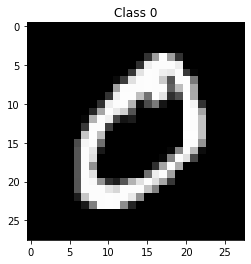

In [5]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# we can load the MNIST dataset from Keras datasets
# 60.000 training samples and 10.000 images in test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

# let's polit a grayscale image with the label
plt.imshow(X_train[1], cmap='gray')
plt.title('Class ' + str(y_train[1]))
plt.show()

In [6]:
from keras.utils import np_utils

# TensorFlow can handle format: (batch,height,width,channel)
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

# very similar to min-max normalization: we transform the values
# within the range [0,1] as usual
features_train /= 255
features_test /= 255

# we have 10 output classes we want to end up with one hot
# encoding as we have seen for the Iris-dataset
# 2 -> [0 0 1 0 0 0 0 0 0 0]
targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D


#let's build the Convolutional Neural Network (CNN)
model = Sequential()

# input is a 28x28 pixels image
# 32 is the number of filters - (3,3) size of the filter
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))  # default stride (1, 1)
model.add(Activation('relu'))

# Normalizes the activations in the previous layer after the convolutional phase
# transformation maintains the mean activation close to 0 std close to 1
# the scale of each dimension remains the same
# reduces running-time of training significantly
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# flattening layer 
model.add(Flatten())

# Fully connected layer
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Regularization helps to avoid overfitting
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                    

In [8]:
# Multiclass classification: cross-entropy loss-function with ADAM optimizer
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(features_train, targets_train, batch_size=128, epochs=2, validation_data=(features_test,targets_test), verbose=1)

score = model.evaluate(features_test, targets_test)
print('Test accuracy: %.2f' % score[1])

Epoch 1/2
469/469 [==============================] - 54s 112ms/step - loss: 0.0991 - accuracy: 0.9697 - val_loss: 0.6780 - val_accuracy: 0.7579
Epoch 2/2
313/313 [==============================] - 5s 14ms/step - loss: 0.0290 - accuracy: 0.9918
Test accuracy: 0.99


### Data Augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Data Augmentation helps to reduce overfitting
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.2,
                         height_shift_range=0.07, zoom_range=0.05)

test_genrator = ImageDataGenerator()  # no transformation in test data set

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_genrator.flow(features_test, targets_test, batch_size=64)

model.fit(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 104s 111ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0340 - val_accuracy: 0.9896
Epoch 2/5
937/937 [==============================] - 101s 108ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0280 - val_accuracy: 0.9909
Epoch 3/5
937/937 [==============================] - 100s 107ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 4/5
937/937 [==============================] - 99s 106ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 5/5
937/937 [==============================] - 105s 113ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0378 - val_accuracy: 0.9885


## 26. Machine Learning Project III - Identifying Objects with CNNs

In [4]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical

# load data - 50k training samples and 10k test samples
# 32x32 pixel images - 10 output classes (labels)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(np.unique(y_train))

# One-hot encoding for the labels (1,2 ...) will be replaced by arrays with 1s and 0s
# 0 - [1,0,0,0,0,0,0,0,0]
# 1 - [0,1,0,0,0,0,0,0,0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)  # One-hot encoded

# Normalize the data (test and training set as well)
X_train = X_train / 255.0
X_test = X_test / 255.0

(50000, 32, 32, 3) (50000, 1)
[0 1 2 3 4 5 6 7 8 9]
(50000, 10)


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
# from keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization


# construct the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())  # Faster Training, a sort of regularization effect
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))  # Regularization
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))  # Regularization
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))  # Regularization
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))  # Regularization
model.add(Dense(10, activation='softmax'))

# training the model
optimizer = SGD(learning_rate=0.001, momentum=0.95)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# evaluate model
model_result = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of CNN model: %s' % (model_result[1] * 100.0))

Epoch 1/50
782/782 - 333s - loss: 1.6733 - accuracy: 0.3951 - val_loss: 1.4533 - val_accuracy: 0.4856 - 333s/epoch - 425ms/step
Epoch 2/50
782/782 - 280s - loss: 1.3238 - accuracy: 0.5223 - val_loss: 1.1894 - val_accuracy: 0.5684 - 280s/epoch - 358ms/step
Epoch 3/50
782/782 - 259s - loss: 1.1617 - accuracy: 0.5813 - val_loss: 1.1244 - val_accuracy: 0.5992 - 259s/epoch - 331ms/step
Epoch 4/50
782/782 - 255s - loss: 1.0517 - accuracy: 0.6222 - val_loss: 1.0286 - val_accuracy: 0.6383 - 255s/epoch - 327ms/step
Epoch 5/50
782/782 - 4771s - loss: 0.9767 - accuracy: 0.6545 - val_loss: 0.9330 - val_accuracy: 0.6748 - 4771s/epoch - 6s/step
Epoch 6/50
782/782 - 208s - loss: 0.9096 - accuracy: 0.6781 - val_loss: 0.8645 - val_accuracy: 0.6962 - 208s/epoch - 266ms/step
Epoch 7/50
782/782 - 264s - loss: 0.8584 - accuracy: 0.6958 - val_loss: 0.9448 - val_accuracy: 0.6767 - 264s/epoch - 338ms/step
Epoch 8/50
782/782 - 242s - loss: 0.8058 - accuracy: 0.7143 - val_loss: 0.7684 - val_accuracy: 0.7329 - 2

### Regularization

It is a technique to reduce the overfitting on the training data.

1. Weight Decay: L1, L2 Regularization
  - To prevent edge weights getting too large
2. Dropout
  - To prevent complex co-adaptations on training data
  - It is a good approach to re-scale the weight by the chosen dropout rate.
3. Data Augmentation
  - Random transformations on the images (rotations, flipping, scaling, ...)
  - Increase the size of dataset

## 27. Recurrent Neural Networks (RNN)

- Google translator relies heavily on recurrent neural networks
- We can use recurrent neural networks to make time series analysis

### Turing-test

A computer passes the Turing-test if a human is unable to distinguish the computer from a human in a blind test

- RNN is able to pass this test: a well-trained recurrent network is able to "understand" Enligsh for example. 


      Temperature
0            20.7
1            17.9
2            18.8
3            14.6
4            15.8
...           ...
3645         14.0
3646         13.6
3647         13.5
3648         15.7
3649         13.0

[3650 rows x 1 columns]
[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


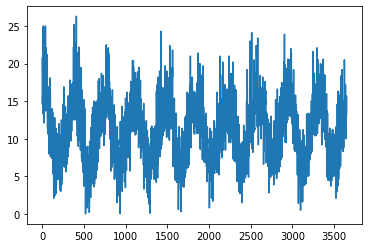

In [5]:
# Time Series Analysis

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler


# We want to make sure the results will be the same every time we run the algorithm
numpy.random.seed(1)

# load the dataset
data_frame = read_csv('Data/daily_min_temperatures.csv', usecols=[1])

# we just need the temperature column
data = data_frame.values
print(data_frame)
print(data)
plt.plot(data_frame)
plt.show()  # statistical property semms a constant. (stationary data)

# Data Pre-Processing

# we are dealing with floating-point values
data = data.astype('float32')

# min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# split into train and test sets (70% - 30%)
train, test = data[0:int(len(data) * 0.7), :], data[int(len(data) * 0.7):len(data), :]



In [9]:
# Convert an array of values into a matrix of features
# that are the previous time series values in the past
def reconstruct_data(data_set, n=1):
    x, y = [], []

    for i in range(len(data_set) - n - 1):
        a = data_set[i:(i + n), 0]
        x.append(a)
        y.append(data_set[i + n, 0])

    return numpy.array(x), numpy.array(y)

NUM_OF_PREV_ITEMS = 5

# Create the training data and test data matrix
train_x, train_y = reconstruct_data(train, NUM_OF_PREV_ITEMS)
test_x, test_y = reconstruct_data(test, NUM_OF_PREV_ITEMS)
print(train_x)
print(train_y)

# reshape input to be [numOfSamples, time steps, numOfFeatures]
# time steps is 1 because we want to predict the next value (t+1)
print(train_x.shape)
print((train_x.shape[0], 1, train_x.shape[1]))
train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = numpy.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape)
print(train_x)

[[0.7870723  0.6806084  0.7148289  0.5551331  0.6007605 ]
 [0.6806084  0.7148289  0.5551331  0.6007605  0.6007605 ]
 [0.7148289  0.5551331  0.6007605  0.6007605  0.6007605 ]
 ...
 [0.4334601  0.42585555 0.4600761  0.48288977 0.61596966]
 [0.42585555 0.4600761  0.48288977 0.61596966 0.53992397]
 [0.4600761  0.48288977 0.61596966 0.53992397 0.54372627]]
[0.6007605  0.6007605  0.661597   ... 0.53992397 0.54372627 0.50570345]
(2549, 5)
(2549, 1, 5)
(2549, 1, 5)
[[[0.7870723  0.6806084  0.7148289  0.5551331  0.6007605 ]]

 [[0.6806084  0.7148289  0.5551331  0.6007605  0.6007605 ]]

 [[0.7148289  0.5551331  0.6007605  0.6007605  0.6007605 ]]

 ...

 [[0.4334601  0.42585555 0.4600761  0.48288977 0.61596966]]

 [[0.42585555 0.4600761  0.48288977 0.61596966 0.53992397]]

 [[0.4600761  0.48288977 0.61596966 0.53992397 0.54372627]]]


Epoch 1/10
160/160 - 8s - loss: 0.0388 - 8s/epoch - 49ms/step
Epoch 2/10
160/160 - 1s - loss: 0.0157 - 1s/epoch - 6ms/step
Epoch 3/10
160/160 - 1s - loss: 0.0143 - 1s/epoch - 7ms/step
Epoch 4/10
160/160 - 1s - loss: 0.0130 - 1s/epoch - 8ms/step
Epoch 5/10
160/160 - 1s - loss: 0.0126 - 1s/epoch - 7ms/step
Epoch 6/10
160/160 - 1s - loss: 0.0117 - 965ms/epoch - 6ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0115 - 707ms/epoch - 4ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0113 - 775ms/epoch - 5ms/step
Epoch 9/10
160/160 - 1s - loss: 0.0106 - 831ms/epoch - 5ms/step
Epoch 10/10
160/160 - 1s - loss: 0.0110 - 869ms/epoch - 5ms/step
35/35 [==============================] - 1s 2ms/step
Score on test set: 5.89 MSE


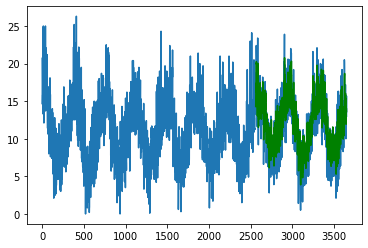

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

# create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, NUM_OF_PREV_ITEMS)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# optimize the model with ADAM optimizer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=16, verbose=2)

# make predictions and min-max normalization
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict)  # inverse_transfrom to get the original values
test_labels = scaler.inverse_transform([test_y])

test_score = mean_squared_error(test_labels[0], test_predict[:, 0])
print('Score on test set: %.2f MSE' % test_score)

# plot the results (original data + predictions)
test_predict_plot = numpy.empty_like(data)
test_predict_plot[:, :] = numpy.nan
test_predict_plot[len(train_x)+2*NUM_OF_PREV_ITEMS+1:len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(test_predict_plot, color="green")
plt.show()